# **Price of Housing in California Project**

## Get the data


In [63]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml2/tree/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


def fetch_housing_data(housing_path=HOUSING_PATH):
    """Function to uncompressed tar archive """
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    housing_tgz = tarfile.open("resources/housing.tgz")
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


fetch_housing_data("resources")


In [64]:
import pandas as pd


def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


data = load_housing_data("resources")
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## **Exploratory Data Analysis**
We can see that each row represent one district

In [65]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


En la columna total_bedrooms faltan algunos valores de los cuales tendremos que ocuparnos.


In [66]:
data['ocean_proximity'].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [67]:
data.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

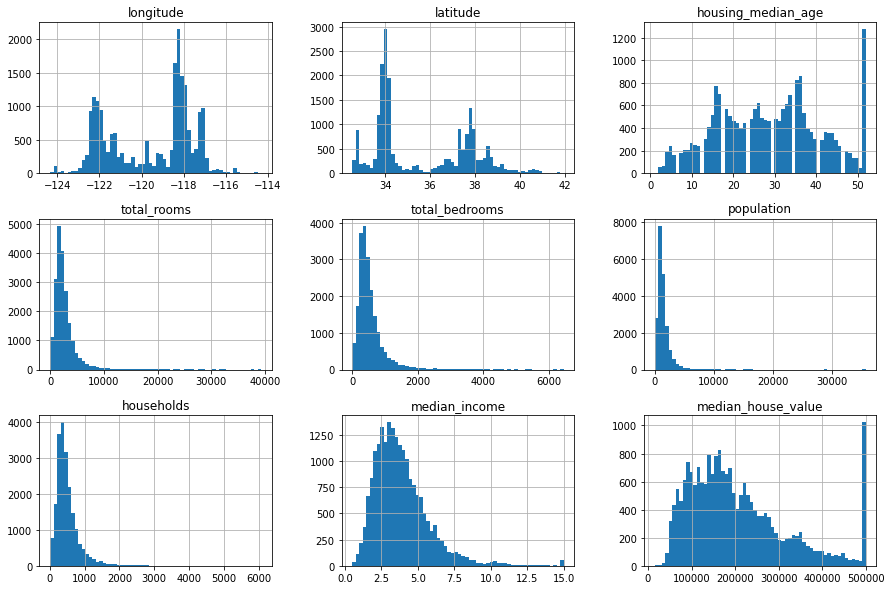

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

data.hist(bins=60, figsize=(15, 10))


Que información podemos extraer de estos Histograms: 
1. El atributo de **median_income** no parece estar
expresado en dólares estadounidenses (USD). Tras consultar con el
equipo que recopiló los datos, se le informa de que los datos se han
escalado y limitado a 15 (en realidad, 15,0001) para las rentas medias
más altas, y a 0,5 (en realidad, 0,4999) para las rentas medias más
bajas. Las cifras representan aproximadamente
decenas de miles de dólares (por ejemplo, 3 significa en realidad
unos 30.000 dólares)
>Trabajar con atributos preprocesados es habitual en Machine Learning,
 
2.  También se han limitado los atributos **housing_median_age** y **median_house_value**
> Esto puede ser un problema grave, ya que es su atributo objetivo el que esta limitado y y el modelos puede aprender eso y entonces nunca dar un valor por encima de 500 000

* Si le dicen que necesitan predicciones precisas incluso más allá de 500.000 dólares, entonces tiene dos opciones:

     **2.1**  Recoger las etiquetas apropiadas para los distritos cuyas etiquetas fueron limitadas.
 
     **2.2** Elimine esos distritos del conjunto de entrenamiento (y del conjunto de prueba, ya que su sistema no
    debería evaluarse mal si predice valores superiores a 500 000
 
3. Estos atributos tienen escalas muy diferentes.


### **Create a test data**

el cerebro es un sistema de detección de patrones
asombroso, lo que significa que es muy propenso al sobreajuste: si observas el
conjunto de pruebas, puedes tropezar con algún patrón aparentemente
interesante en los datos de prueba que te lleve a seleccionar un tipo particular
de modelo de aprendizaje automático

In [69]:
from sklearn.model_selection import train_test_split
import numpy as np

# to make this notebook's output identical at every run
np.random.seed(42)

# For illustration only. Sklearn has train_test_split()


def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


train_set, test_set = split_train_test(data, 0.2)
# train_set, test_set = train_test_split(data,test_size=0.2,random_state=42)
test_set.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


Para tener una división estable entre entrenamiento y prueba incluso después de **actualizar el conjunto de datos**,
es común utilizar el identificador de cada instancia para decidir si debe ir o no al conjunto de prueba (suponiendo que las instancias tengan un
identificador único e inmutable). Por ejemplo, se puede **calcular un hash** del
identificador de cada instancia y poner esa instancia en el conjunto de prueba
si el hash es inferior o igual al 20% del valor hash máximo. De este modo se
garantiza que el conjunto de prueba será coherente en varias ejecuciones,
incluso si se actualiza el conjunto de datos.

Si se utiliza el índice de filas como identificador único, hay que asegurarse de
que los nuevos datos se añaden al final del conjunto de datos y de que nunca
se borra ninguna fila. Si esto no es posible, puede intentar utilizar las
características más estables para construir un identificador único. Por ejemplo, usar la latitud y la longitud 

In [70]:
from zlib import crc32


def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32


def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


housing_with_id = data.reset_index()   # adds an `index` column
id_train_set, id_test_set = split_train_test_by_id(housing_with_id, 0.2, "index")


#### **Stratified sampling**
Obtener un conjunto de entrenamiento y de prueba con las mismas proporciones de acuerdo a una caracteristica. Es decir un conjunto representativo de la poblacion global.
  
> Este es el iterador por defecto que usa *cross_val_score* para equilibrar la variable objetivo en sus train-test

<AxesSubplot:>

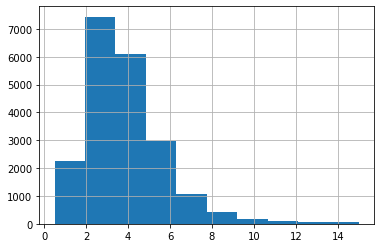

In [71]:
data["median_income"].hist()


Como podemos ver lamayoría de los valores de la mediana de ingresos se agrupan en torno a 1,5 a 6. Por los tanto si escogemos de manera aleatoria el conjunto de prueba  podemos obtener  un **conjunto no representativo**

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

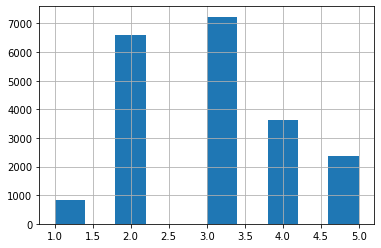

In [72]:
data["income_cat"] = pd.cut(data["median_income"],
                            bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                            labels=[1, 2, 3, 4, 5])
data['income_cat'].hist()

# calcular el % de cada categoria en el conjunto de datos completo
data["income_cat"].value_counts() / len(data)


In [73]:
from sklearn.model_selection import StratifiedShuffleSplit
data_stratifiedShuffle = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in data_stratifiedShuffle.split(data, data["income_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

# calcular el % de cada categoria en el conjunto de test
strat_test_set["income_cat"].value_counts() / len(strat_test_set)


3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [74]:
# eliminar la columna ficticia "income_cat"
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)


### **Discover and Visualize the Data to Gain Insights**
Realizar una copia de los datos de entrenamiento para comenzar la EDA mas profunda. Si el conjunto de entrenamiento es demasiado grande se puede seleccionar una muestra de este(en este caso no es asi)

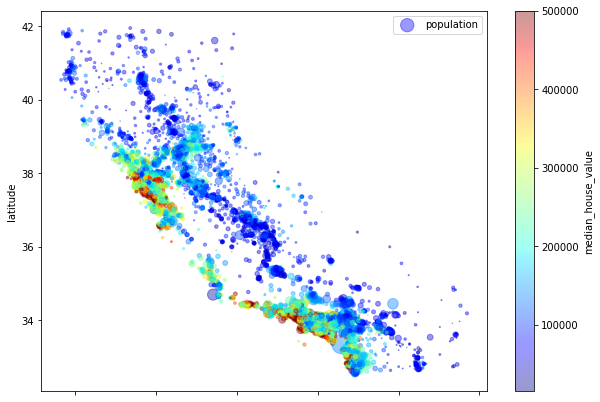

In [75]:
housing = strat_train_set.copy()

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             )
plt.legend()


El radio de cada círculo representa la población del distrito (opción s), y el color representa el
precio (opción c).

#### **Looking for Correlations**

In [76]:
matrix_corr = housing.corr() # devuelveun data frame 
matrix_corr['median_house_value'].sort_values(ascending = True)

latitude             -0.142673
longitude            -0.047466
population           -0.026882
total_bedrooms        0.047781
households            0.064590
housing_median_age    0.114146
total_rooms           0.135140
median_income         0.687151
median_house_value    1.000000
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

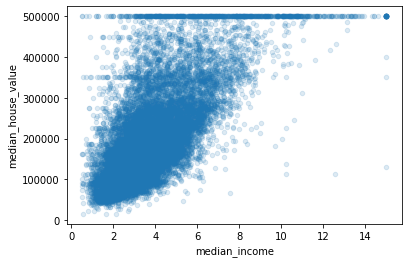

In [77]:
housing.plot(kind='scatter', x='median_income',y = 'median_house_value',alpha=0.15)

#### **Experimenting with Attribute Combinations**
Una última cosa que puede querer hacer antes de preparar los datos para los
algoritmos de ML es probar varias combinaciones de
atributos. Por ejemplo, el número total de habitaciones de un distrito no es
muy útil si no se sabe cuántos hogares hay. Lo que realmente quieres es el
número de habitaciones por hogar. Del mismo modo, el número total de
habitaciones por sí solo no es muy útil: probablemente quiera compararlo con
el número de habitaciones y la población por hogar también parece una
combinación de atributos interesante.

In [78]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

housing["bedrooms_raiz"] = housing["bedrooms_per_room"]** 0.5

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
bedrooms_raiz              -0.297101
Name: median_house_value, dtype: float64

No esta mal. Como vemos las habitaciones por familia esta  mas correlacionado con el precio que el numero total de habitaciones 

## **Prepare the Data por ML algorithms**
Es muy importante crear funciones para poder reutilizarla con nuevos datos o reutilizarlos en otros proyectos

In [79]:
# volvamos a un conjunto de entrenamiento limpio y eliminemos la variable objetivo
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


### **Data cleaning**
Tenemos como ejemplo los datos que faltan en la columna *total_bedrooms*

In [80]:
housing.dropna(subset=["total_bedrooms"])    # eliminar las filas faltantes
housing.drop("total_bedrooms", axis=1)       # eliminar la columna

median = housing["total_bedrooms"].median()  # llenar los valores faltantes con la media
housing["total_bedrooms"].fillna(median, inplace=True)

### **Handling Text and Categorical Attributes**

In [90]:
from sklearn.preprocessing import OrdinalEncoder

housing_cat = housing[['ocean_proximity']]
ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(np.array(housing_cat))
print(ordinal_encoder.categories_)
housing_cat_encoded


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

Lo negativo de esta representación es que los algoritmos de ML asumirán
que dos valores cercanos son más similares que dos valores distantes. Esto
puede estar bien en algunos casos (por ejemplo, para categorías ordenadas
como "malo", "medio", "bueno" y "excelente"), pero obviamente no es el caso
de la columna ocean_proximity. La otra alternativa es usar **one-hotencoding** o **Dummy Variables** que es crear una columana para cada categoria.No es recomdable esta ultima tranformación si las categorias de la columna son muchas ya que obtendriamos muchas caracteristicas y podria dificultar el proceso de aprendizaje 

In [91]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

### **Custom Transformers**
Let's create a custom transformer to add extra attributes:


In [94]:
from sklearn.base import BaseEstimator 
from sklearn.base import TransformerMixin # clase para mezclar el fit() y el trasform 

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

Also, `housing_extra_attribs` is a NumPy array, we've lost the column names (unfortunately, that's a problem with Scikit-Learn). To recover a `DataFrame`, you could run this:

In [96]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


### **Transformation Pipelines(sequencia de procesamiento)**

In [105]:
# Now let's build a pipeline for preprocessing the numerical attributes:

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
housing_num = housing.drop("ocean_proximity", axis=1)
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [108]:
# otro ejemplo donde se tratan las columnas numericas y categoricas iguales

from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num) # obtener el nombre de las columnas del DataFrame
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared[0]



array([-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
        0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
       -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ])

## **Select and Train a Model**
. El objetivo es preseleccionar unos pocos modelos prometedores (entre dos y cinco).

In [110]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

# RMSE de este modelo de regresión en todo el conjunto de entrenamiento
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

No esta mal para no tener nada pero un error de 68 mil dolares es un error muy alto y más cuando los precios estan aproximadamente en tre 120K y 265K. 
 
Las principales formas de corregir la **inadaptación** son
seleccionar un modelo más potente, alimentar el algoritmo de entrenamiento
con mejores características o reducir las restricciones del modelo.

In [115]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [117]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
                         
tree_rmse_scores = np.sqrt(-scores)

In [118]:


from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)

print(forest_rmse)

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
np.sqrt(-forest_scores)


18773.467099255016


array([51228.79188415, 49090.17109823, 46769.35168973, 51877.52066285,
       47310.46838374, 51731.97615353, 52876.74461615, 49560.46190459,
       48242.17938719, 53986.16403712])

Como vemos RandomForest es mucho mejor pero esta **Overfitting trainning** que se evidencia en las grandes diferencias que hay entre las puntuaciones del CV y las del conunto de entrenamiento.

In [ ]:
import joblib
joblib.dump(, "my_model.pkl")
# and later...
my_model_loaded = joblib.load("my_model.pkl")

## **Fine-Tune your model**
Podemos probar con GridSearchCV, RandomizedSearch o Ensemble Strategies ra ajustar los Hyperparametros. Tambien podemos volver EDA y cambiar  o eliminar algunas caracteristicas

Puede que quiera hacerse una idea de la
precisión de esta estimación. Para ello, puede calcular un intervalo de
confianza del 95% para el error de generalización utilizando
```scipy.stats.t.interval()```:


In [ ]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))
